# Практична робота №2
## Варіант 2
**Опис Компанії-Замовника:** Scott Polar Research Institute (SPRI) -  Британський інститут, що є частиною Кембриджського університету, який займається всесторонніми дослідженнями полярних регіонів.\
***---------------------------------------------***\
**Запит:** Організація потребує розробки алгоритму, здатного класифікувати різні види пінгвінів на основі зібраних даних, щоб поліпшити розуміння різноманіття та розподілу цих видів у регіоні.\
***---------------------------------------------***\
**Пропозиція Реалізації:** Створення моделі машинного навчання для класифікації видів пінгвінів. Модель повинна враховувати різні фізичні характеристики, такі як розміри тіла, маса та гендерні особливості, для точного визначення виду кожного пінгвіна. Ця класифікація допоможе визначити основні видові групи пінгвінів у регіоні та їх розподіл, сприяючи кращому збереженню цих видів та розумінню їхнього екологічного статусу.**

## Підготовка роботи ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

## Читаємо файл із даними ##

In [2]:
ds = pd.read_csv('variant_2.csv')
ds.head()

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
0,0,PAL0708,0,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,7.63220,-27.01854,Not enough blood for isotopes.,Adelie Penguin (Pygoscelis adeliae)
1,1,PAL0708,1,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
2,2,PAL0708,2,Anvers,NaN,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
3,3,PAL0708,3,Anvers,NaN,"Adult, 1 Egg Stage",NaN,Yes,11/16/07,41.1,17.0,190.0,3800.0,NaN,7.63220,-27.01854,NaN,Adelie Penguin (Pygoscelis adeliae)
4,4,PAL0708,4,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)


## Завдання 
**Замініть відсутні значення, якщо такі присутні та обґрунтуйте вибір методу(ів)**

***Усі унікальні значення***

In [3]:

unique_values = {col: ds[col].unique() for col in ds.columns}
print("\nUnique values in columns:")
for col, values in unique_values.items():
    print(f"{col}: {values}")


Unique values in columns:
Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

***Порожні значення***

In [4]:
missing_data = ds.isnull().sum()
missing_percentage = (missing_data / len(ds)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

print("Missing Values:")
print(missing_report[missing_report['Missing Values'] > 0])

Missing Values:
                   Missing Values  Percentage
Island                         45    9.868421
Stage                           4    0.877193
Individual ID                  45    9.868421
Clutch Completion               4    0.877193
Sex                            45    9.868421
Comments                       35    7.675439


***Усі рядки в яких є пропущені значення***

In [5]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
rows_with_missing_values = ds[ds.isna().any(axis=1)]
display(rows_with_missing_values)

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
0,0,PAL0708,0,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.100000,18.700000,181.000000,3750.000000,NaN,7.632200,-27.01854,Not enough blood for isotopes.,Adelie Penguin (Pygoscelis adeliae)
2,2,PAL0708,2,Anvers,NaN,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.300000,18.000000,195.000000,3250.000000,FEMALE,8.368210,-25.33302,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
3,3,PAL0708,3,Anvers,NaN,"Adult, 1 Egg Stage",NaN,Yes,11/16/07,41.100000,17.000000,190.000000,3800.000000,NaN,7.632200,-27.01854,NaN,Adelie Penguin (Pygoscelis adeliae)
5,5,PAL0708,5,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.300000,20.600000,190.000000,3650.000000,MALE,8.664960,-25.29805,NaN,Adelie Penguin (Pygoscelis adeliae)
6,6,PAL0708,6,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.900000,17.800000,181.000000,3625.000000,NaN,9.187180,-25.21799,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
9,9,PAL0708,9,Anvers,NaN,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.000000,20.200000,190.000000,4250.000000,MALE,9.133620,-25.09368,No blood sample obtained for sexing.,Adelie Penguin (Pygoscelis adeliae)
10,10,PAL0708,10,Anvers,Torgersen,"Adult, 1 Egg Stage",NaN,Yes,11/9/07,37.800000,17.100000,186.000000,3300.000000,MALE,8.632430,-25.21315,No blood sample obtained for sexing.,Adelie Penguin (Pygoscelis adeliae)
11,11,PAL0708,11,Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,Yes,11/9/07,37.800000,17.300000,180.000000,3700.000000,NaN,7.632200,-27.01854,No blood sample obtained.,Adelie Penguin (Pygoscelis adeliae)
12,12,PAL0708,12,Anvers,Torgersen,"Adult, 1 Egg Stage",NaN,Yes,11/15/07,41.100000,17.600000,182.000000,3200.000000,NaN,7.632200,-27.01854,Not enough blood for isotopes.,Adelie Penguin (Pygoscelis adeliae)
13,13,PAL0708,13,Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,Yes,11/15/07,38.600000,21.200000,191.000000,3800.000000,NaN,7.632200,-27.01854,Not enough blood for isotopes.,Adelie Penguin (Pygoscelis adeliae)


### Крок 1 (Island)



***Подивимось на кількість пінгівін на кожному острові***

In [6]:
print(ds['Island'].value_counts())

Island
Dream        188
Biscoe       182
Torgersen     41
Name: count, dtype: int64


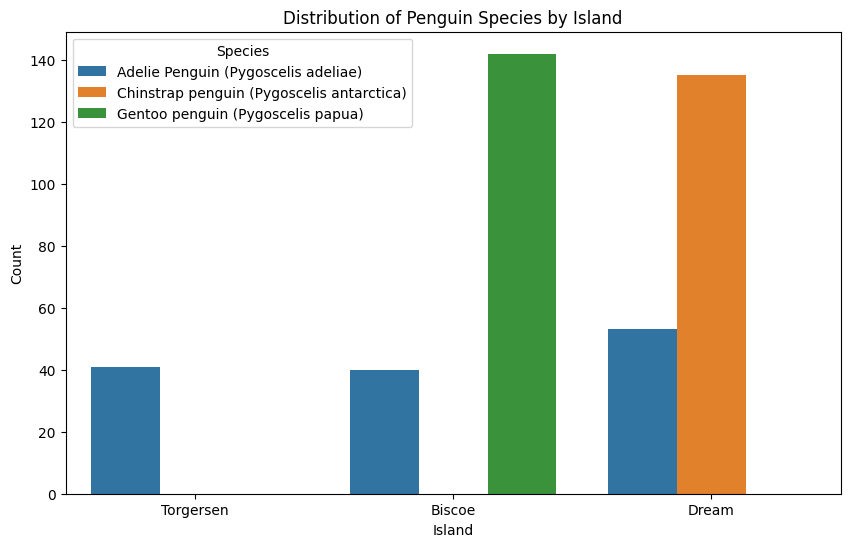

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Island", hue="Species", data=ds)
plt.title("Distribution of Penguin Species by Island")
plt.xlabel("Island")
plt.ylabel("Count")
plt.legend(title="Species")
plt.show()

_Заповнення пропущених значень в колонці Island модою (найчастіше значенням) доцільне, оскільки острів — це категоріальна змінна. Це дозволяє зберегти узгодженість даних без втрати інформації._

In [8]:
ds['Island'] = ds['Island'].fillna(ds['Island'].mode()[0])

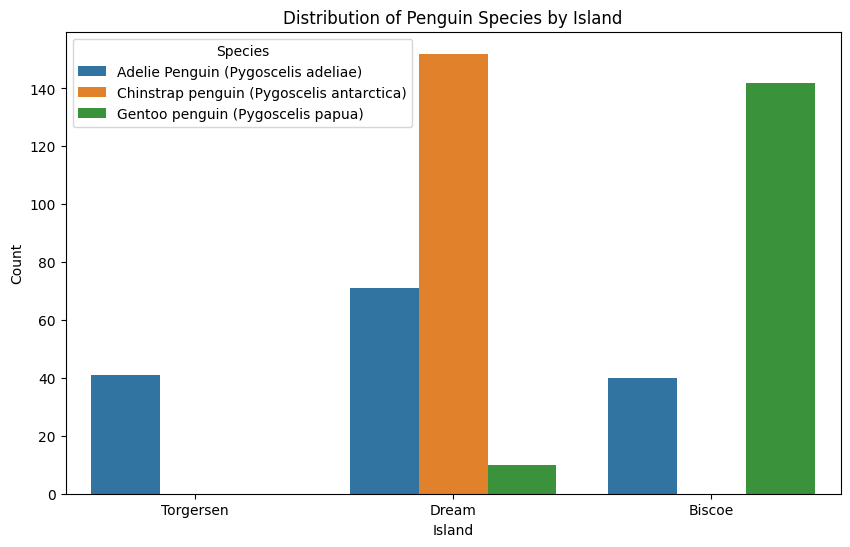

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Island", hue="Species", data=ds)
plt.title("Distribution of Penguin Species by Island")
plt.xlabel("Island")
plt.ylabel("Count")
plt.legend(title="Species")
plt.show()

### Крок 2 (Stage)


_Оскільки у колонці ***Stage*** є лише одне унікальне не порожнє значення, тому замінюємо всі порожні на нього_

In [10]:
print(ds['Stage'].value_counts())

Stage
Adult, 1 Egg Stage    452
Name: count, dtype: int64


In [11]:
ds['Stage'] = ds['Stage'].fillna('Adult, 1 Egg Stage')

### Крок 3 (Individual ID)


In [12]:
print(ds['Individual ID'].value_counts())

Individual ID
N72A2     11
N69A1      6
N35A1      6
N67A1      5
N72A1      5
N73A2      5
N61A2      5
N11A2      4
N67A2      4
N22A1      4
N21A1      4
N13A2      4
N85A2      4
N61A1      4
N18A1      4
N70A1      4
N71A1      4
N75A2      4
N56A2      4
N46A2      4
N6A2       4
N95A2      4
N53A1      3
N39A1      3
N36A1      3
N64A1      3
N38A2      3
N41A2      3
N39A2      3
N64A2      3
N63A1      3
N50A2      3
N60A1      3
N1A1       3
N66A2      3
N69A2      3
N73A1      3
N85A1      3
N62A1      3
N62A2      3
N68A2      3
N86A1      3
N88A1      3
N90A1      3
N95A1      3
N96A1      3
N98A1      3
N56A1      3
N35A2      3
N92A2      3
N34A2      3
N29A1      3
N24A1      3
N24A2      3
N21A2      3
N34A1      3
N13A1      3
N28A1      3
N8A1       3
N28A2      3
N22A2      3
N4A2       3
N23A2      3
N2A1       2
N8A2       2
N89A1      2
N20A2      2
N71A2      2
N20A1      2
N18A2      2
N17A2      2
N17A1      2
N19A2      2
N19A1      2
N12A2      2
N12A1      

_Оскільки значення повторюються, то щоби не змінювати сильно дисперсію змінної, присвоїмо порожнім значенням випадкові значення із списку_

In [13]:
existing_ids = ds['Individual ID'].dropna().unique()

def fill_with_random_existing_id(row):
    if pd.isnull(row['Individual ID']):
        return np.random.choice(existing_ids)
    return row['Individual ID']

ds['Individual ID'] = ds.apply(fill_with_random_existing_id, axis=1)

In [14]:
print(ds['Individual ID'].value_counts())

Individual ID
N72A2     11
N61A2      6
N35A1      6
N69A1      6
N36A1      5
N34A1      5
N95A2      5
N13A2      5
N38A2      5
N46A2      5
N73A2      5
N67A1      5
N72A1      5
N34A2      4
N67A2      4
N62A2      4
N86A2      4
N1A1       4
N21A1      4
N85A1      4
N85A2      4
N70A1      4
N71A1      4
N92A2      4
N75A2      4
N86A1      4
N56A2      4
N20A2      4
N22A1      4
N61A1      4
N16A2      4
N18A1      4
N6A2       4
N11A2      4
N8A1       4
N39A2      4
N64A2      3
N8A2       3
N69A2      3
N66A2      3
N63A1      3
N64A1      3
N21A2      3
N60A1      3
N53A1      3
N50A2      3
N42A2      3
N73A1      3
N18A2      3
N41A2      3
N62A1      3
N68A2      3
N71A2      3
N4A2       3
N88A1      3
N88A2      3
N90A1      3
N95A1      3
N96A1      3
N98A1      3
N56A1      3
N15A2      3
N20A1      3
N42A1      3
N89A1      3
N29A1      3
N12A1      3
N87A2      3
N28A2      3
N28A1      3
N13A1      3
N35A2      3
N24A1      3
N23A2      3
N24A2      3
N23A1      

### Крок 4 (Clutch Completion)


In [15]:
print(ds['Clutch Completion'].value_counts())

Clutch Completion
Yes    408
No      44
Name: count, dtype: int64


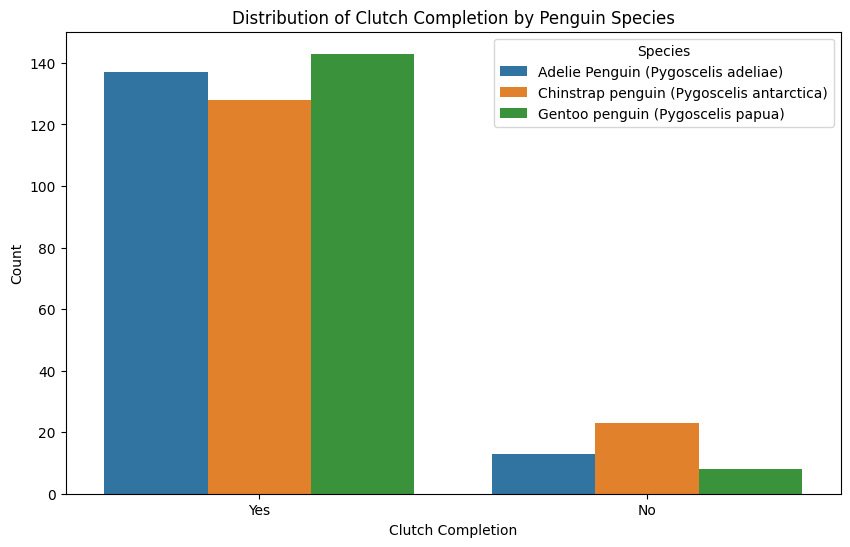

In [16]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Clutch Completion', hue='Species', data=ds)
plt.title('Distribution of Clutch Completion by Penguin Species')
plt.xlabel('Clutch Completion')
plt.ylabel('Count')
plt.show()

In [17]:
count_zeros = ds['Clutch Completion'].isnull().sum()
print("Missing Values:", count_zeros)

Missing Values: 4


_Оскільки пропущені значення займають незначну частину, видалення може бути прийнятним_

In [18]:
ds = ds.dropna(subset=['Clutch Completion'])

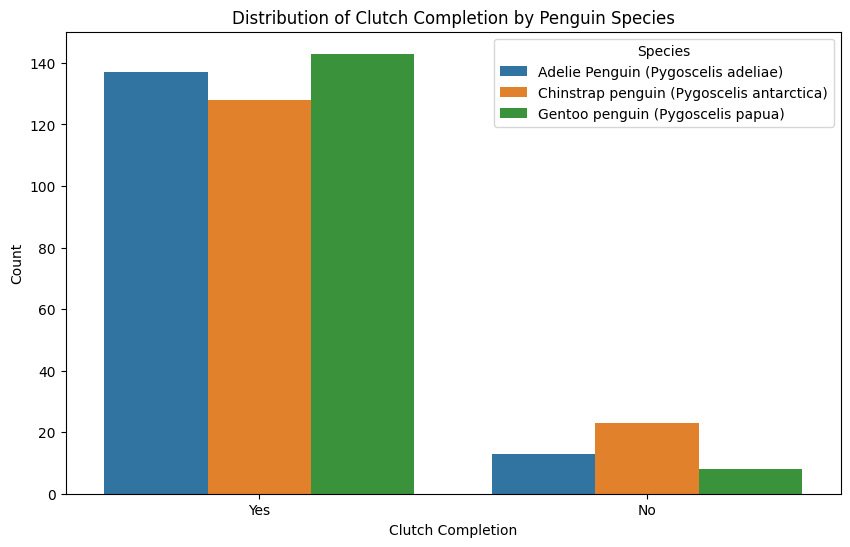

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Clutch Completion', hue='Species', data=ds)
plt.title('Distribution of Clutch Completion by Penguin Species')
plt.xlabel('Clutch Completion')
plt.ylabel('Count')
plt.show()

### Крок 5 (Sex)


In [20]:
print(ds['Sex'].value_counts())

Sex
FEMALE    204
MALE      202
.           1
Name: count, dtype: int64


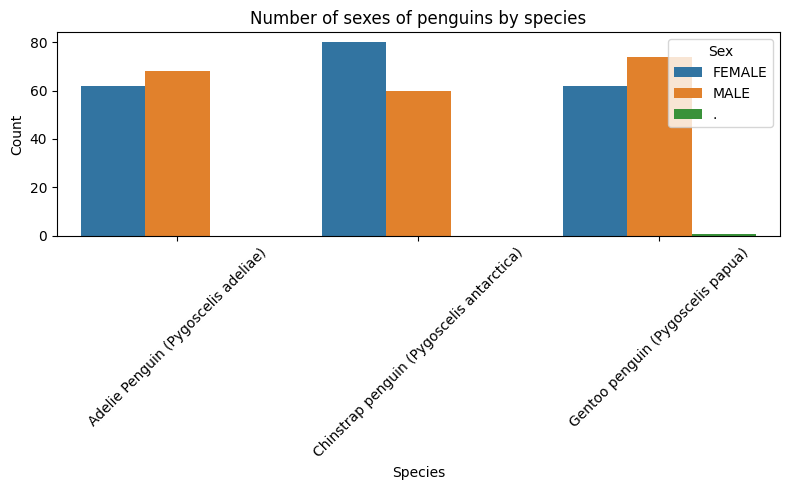

In [21]:
gender_counts = ds.groupby(['Species', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Species', y='Count', hue='Sex', data=gender_counts)

plt.title('Number of sexes of penguins by species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

_Замінимо пропущені значення на найчастіші для кожного виду пінгвінів окремо_

In [22]:
# Функція для знаходження найчастішого значення
def fill_missing_genders(group):
    most_common_gender = group['Sex'].mode()[0]
    group['Sex'] = group['Sex'].fillna(most_common_gender)
    return group

ds['Sex'] = ds.groupby('Species', group_keys=False, as_index=False).apply(lambda g: fill_missing_genders(g[['Species', 'Sex']].copy())[['Sex']])

C:\Users\aziya\AppData\Local\Temp\ipykernel_27232\2097557450.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ds['Sex'] = ds.groupby('Species', group_keys=False, as_index=False).apply(lambda g: fill_missing_genders(g[['Species', 'Sex']].copy())[['Sex']])


In [23]:
filtered = ds[ds['Sex'] == '.']
display(filtered)

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
336,336,PAL0910,336,Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,Nest never observed with full clutch.,Gentoo penguin (Pygoscelis papua)


_Єдине значення статі '.' - просто замінюєм на найчастіше значення у колонці_

In [24]:
most_frequent_value = ds['Sex'].mode()[0]

ds['Sex'] = ds['Sex'].replace('.', most_frequent_value)

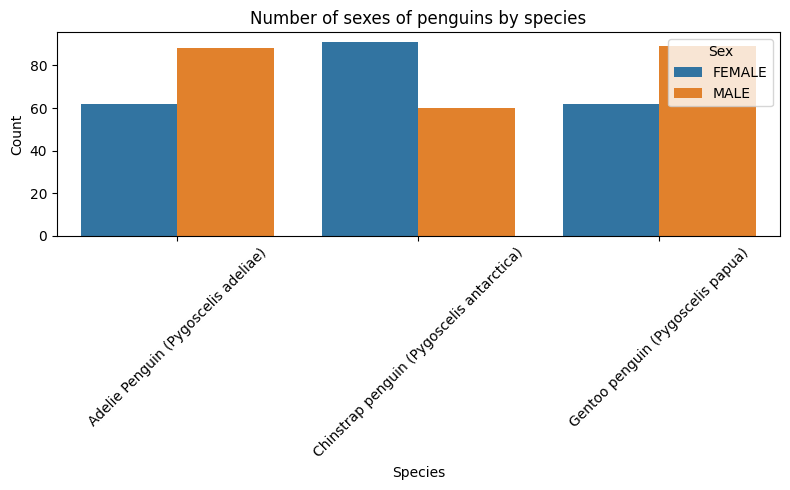

In [25]:
gender_counts = ds.groupby(['Species', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Species', y='Count', hue='Sex', data=gender_counts)

plt.title('Number of sexes of penguins by species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Крок 6 (Comments)


_Замінимо порожні значення на окрему категорію "No comment"_

In [26]:
ds['Comments'] = ds['Comments'].fillna('No comments')

### Результат ###

In [27]:
missing_data = ds.isnull().sum()
print(missing_data)

Unnamed: 0             0
studyName              0
Sample Number          0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
Species                0
dtype: int64


## Завдання
**Проведіть кодування (Categorical Encoding) категоріальних ознак**



## Проглянемо типи даних

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 455
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           452 non-null    int64  
 1   studyName            452 non-null    object 
 2   Sample Number        452 non-null    int64  
 3   Region               452 non-null    object 
 4   Island               452 non-null    object 
 5   Stage                452 non-null    object 
 6   Individual ID        452 non-null    object 
 7   Clutch Completion    452 non-null    object 
 8   Date Egg             452 non-null    object 
 9   Culmen Length (mm)   452 non-null    float64
 10  Culmen Depth (mm)    452 non-null    float64
 11  Flipper Length (mm)  452 non-null    float64
 12  Body Mass (g)        452 non-null    float64
 13  Sex                  452 non-null    object 
 14  Delta 15 N (o/oo)    452 non-null    float64
 15  Delta 13 C (o/oo)    452 non-null    float64


### Крок 1 (StudyName)

In [29]:
ds['studyName'].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

***Створимо числові значення, шляхом обрізання нечислових значень***

In [30]:
ds['studyName'] = ds['studyName'].astype(str)
print(ds['studyName'].unique())
studyName_mapping = {'PAL0708': 708, 'PAL0809': 809, 'PAL0910' :910}
ds['studyName'] = ds['studyName'].map(studyName_mapping)
ds['studyName'] = ds['studyName'].astype(int)
ds['studyName'].unique()

['PAL0708' 'PAL0809' 'PAL0910']


array([708, 809, 910])

### Крок 2 (Sex)

In [31]:
ds['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

***Перетворимо стать на булеві змінні***

In [32]:
sex_mapping = {'MALE': 0}
ds['Sex'] = ds['Sex'].map(sex_mapping).fillna(1)
ds['Sex'] = ds['Sex'].astype(int)
print(ds['Sex'].unique())

[0 1]


### Крок 3 (Species)

In [33]:
ds['Species'] = ds['Species'].astype(str)
print(ds['Species'].unique())

['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']


***Замінимо значення видів пінгвінів на порядкове число***

In [34]:
species_mapping = {'Adelie Penguin (Pygoscelis adeliae)': 0, 'Chinstrap penguin (Pygoscelis antarctica)': 1}
ds['Species'] = ds['Species'].map(species_mapping).fillna(2)
ds['Species'] = ds['Species'].astype(int)
ds['Species'].unique()

array([0, 1, 2])

### Крок 4 (Region)

In [35]:
print(ds['Region'].unique())

['Anvers']


***Замінимо це єдине унікальне значення на статичне число _0_***

In [36]:
ds['Region'] = ds['Region'].replace({'Anvers': 0})
ds['Region'] = ds['Region'].astype(int)
print(ds['Region'].unique())

[0]


### Крок 5 (Clutch Completion)

In [37]:
ds['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

***Перетворимо стать на булеві змінні***

In [38]:
sex_mapping = {'No': 0}
ds['Clutch Completion'] = ds['Clutch Completion'].map(sex_mapping).fillna(1)
ds['Clutch Completion'] = ds['Clutch Completion'].astype(int)
print(ds['Clutch Completion'].unique())

[1 0]


### Крок 6 (Island)

In [39]:
ds['Island'].unique()

array(['Torgersen', 'Dream', 'Biscoe'], dtype=object)

***Замінимо значення островів на число - кількість появи у записах***

In [40]:
island_counts = ds['Island'].value_counts()
ds['Island'] = ds['Island'].map(island_counts)
ds['Island'].unique()

array([ 41, 231, 180], dtype=int64)

### Крок 7 (Stage)

In [41]:
ds['Stage'].unique()

array(['Adult, 1 Egg Stage'], dtype=object)

***Замінимо це єдине унікальне значення на статичне число _1_***

In [42]:
ds['Stage'] = ds['Stage'].replace({'Adult, 1 Egg Stage': 1})
ds['Stage'] = ds['Stage'].astype(int)
print(ds['Stage'].unique())

[1]


### Крок 8 (Date Egg)

In [43]:
ds['Date Egg'].unique()

array(['11/11/07', '11/16/07', '11/15/07', '11/9/07', '11/12/07',
       '11/10/07', '11/13/07', '11/19/07', '11/6/08', '11/9/08',
       '11/15/08', '11/13/08', '11/11/08', '11/14/08', '11/8/08',
       '11/2/08', '11/7/08', '11/17/08', '11/5/08', '11/10/08', '11/9/09',
       '11/15/09', '11/20/09', '11/12/09', '11/17/09', '11/18/09',
       '11/22/09', '11/16/09', '11/21/09', '11/23/09', '11/10/09',
       '11/13/09', '11/14/09', '11/26/07', '11/21/07', '11/28/07',
       '11/22/07', '11/30/07', '12/3/07', '11/25/08', '11/24/08',
       '11/27/09', '11/19/09', '11/27/07', '11/18/07', '11/29/07',
       '11/4/08', '11/3/08', '11/25/09', '12/1/09'], dtype=object)

***Для перетворення, змінимо формат дат, забраши роздільник між ними***

In [44]:
ds['Date Egg'] = ds['Date Egg'].str.replace('/', '', regex=False)
ds['Date Egg'] = ds['Date Egg'].astype(int)
ds['Date Egg'].unique()

array([111107, 111607, 111507,  11907, 111207, 111007, 111307, 111907,
        11608,  11908, 111508, 111308, 111108, 111408,  11808,  11208,
        11708, 111708,  11508, 111008,  11909, 111509, 112009, 111209,
       111709, 111809, 112209, 111609, 112109, 112309, 111009, 111309,
       111409, 112607, 112107, 112807, 112207, 113007,  12307, 112508,
       112408, 112709, 111909, 112707, 111807, 112907,  11408,  11308,
       112509,  12109])

### Крок 9 (Comments)

In [45]:
ds['Comments'].unique()

array(['Not enough blood for isotopes.',
       'Nest never observed with full clutch.', 'No comments',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

***Закодуємо коментарі відповідно до кількості символів***

In [46]:
ds['Comments'] = ds['Comments'].str.len()
ds['Comments'].unique()

array([30, 37, 11, 25, 36, 68, 62], dtype=int64)

### Крок 10 (Individual ID)

In [47]:
ds['Individual ID'].unique()

array(['N1A1', 'N1A2', 'N2A1', 'N36A1', 'N3A1', 'N3A2', 'N4A1', 'N4A2',
       'N5A1', 'N5A2', 'N71A2', 'N6A2', 'N16A2', 'N7A2', 'N8A1', 'N8A2',
       'N9A1', 'N9A2', 'N10A1', 'N39A2', 'N11A1', 'N11A2', 'N12A1',
       'N12A2', 'N13A1', 'N13A2', 'N17A1', 'N17A2', 'N18A1', 'N18A2',
       'N21A1', 'N21A2', 'N22A1', 'N22A2', 'N23A1', 'N23A2', 'N24A1',
       'N24A2', 'N25A1', 'N25A2', 'N26A1', 'N26A2', 'N27A1', 'N27A2',
       'N28A1', 'N28A2', 'N29A1', 'N29A2', 'N30A1', 'N30A2', 'N80A2',
       'N87A2', 'N32A1', 'N86A2', 'N34A1', 'N34A2', 'N35A1', 'N35A2',
       'N37A1', 'N37A2', 'N38A1', 'N38A2', 'N39A1', 'N40A1', 'N40A2',
       'N41A1', 'N41A2', 'N42A1', 'N42A2', 'N44A1', 'N44A2', 'N45A1',
       'N45A2', 'N46A1', 'N46A2', 'N48A2', 'N49A1', 'N49A2', 'N50A1',
       'N50A2', 'N47A1', 'N47A2', 'N51A1', 'N51A2', 'N53A1', 'N53A2',
       'N55A1', 'N55A2', 'N58A1', 'N62A2', 'N60A1', 'N60A2', 'N61A1',
       'N61A2', 'N63A1', 'N63A2', 'N64A1', 'N64A2', 'N66A1', 'N66A2',
       'N67A1', '

In [48]:
frequency = ds['Individual ID'].value_counts()
ds['Individual ID'] = ds['Individual ID'].map(frequency)
ds['Individual ID'].unique()

array([ 4,  2,  5,  1,  3,  6, 11], dtype=int64)

### Результат кодування 

In [49]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 455
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           452 non-null    int64  
 1   studyName            452 non-null    int32  
 2   Sample Number        452 non-null    int64  
 3   Region               452 non-null    int32  
 4   Island               452 non-null    int64  
 5   Stage                452 non-null    int32  
 6   Individual ID        452 non-null    int64  
 7   Clutch Completion    452 non-null    int32  
 8   Date Egg             452 non-null    int32  
 9   Culmen Length (mm)   452 non-null    float64
 10  Culmen Depth (mm)    452 non-null    float64
 11  Flipper Length (mm)  452 non-null    float64
 12  Body Mass (g)        452 non-null    float64
 13  Sex                  452 non-null    int32  
 14  Delta 15 N (o/oo)    452 non-null    float64
 15  Delta 13 C (o/oo)    452 non-null    float64


## Завдання 
**Опрацюйте аномальні значення**

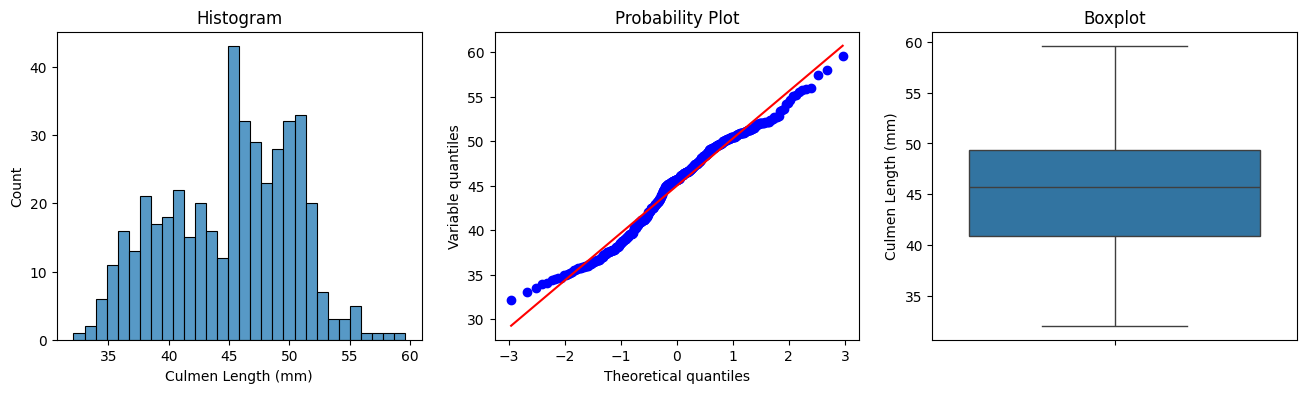

In [50]:
import scipy.stats as stats
def diagnostic_plots(ds, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(ds[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(ds[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=ds[variable])
    plt.title('Boxplot')
    plt.show()
diagnostic_plots(ds, 'Culmen Length (mm)')

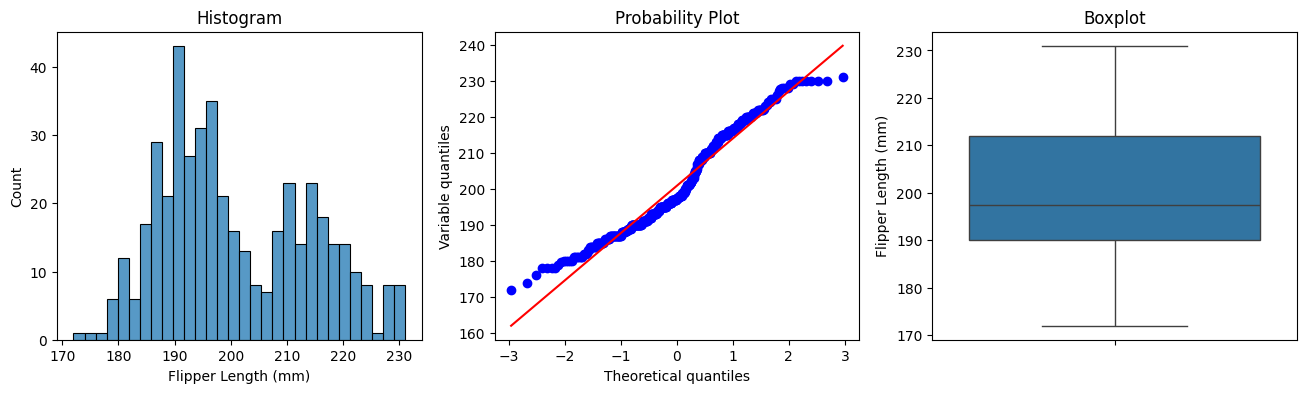

In [51]:
diagnostic_plots(ds, 'Flipper Length (mm)')

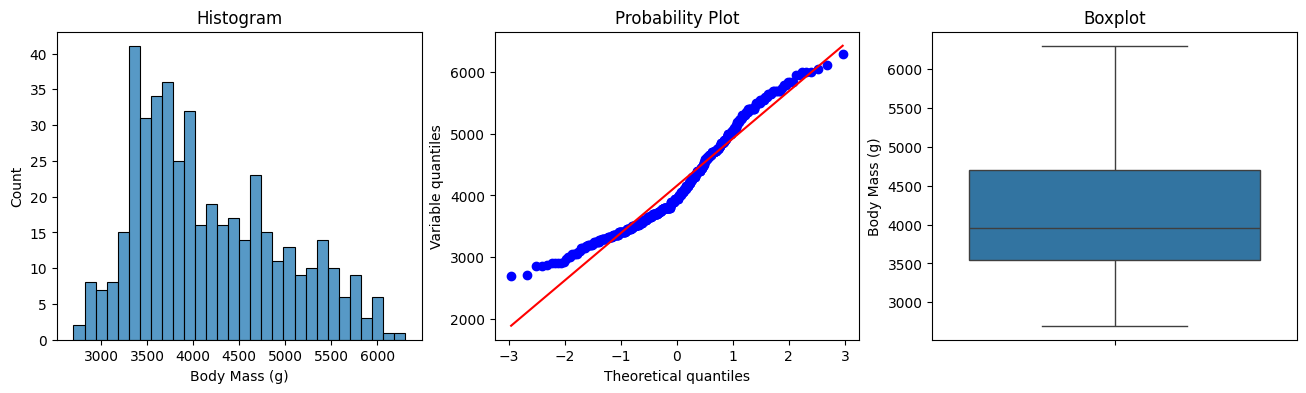

In [52]:
diagnostic_plots(ds, 'Body Mass (g)')

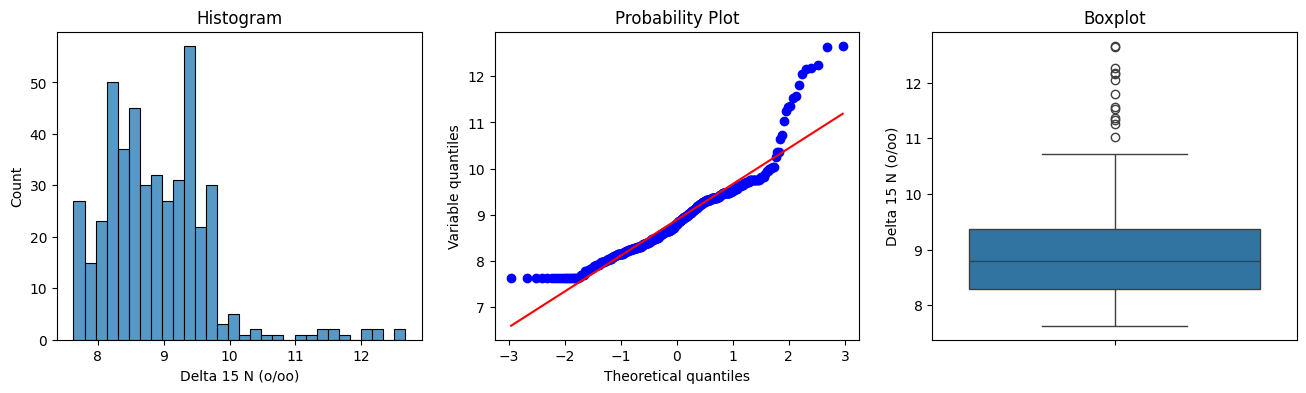

In [53]:
diagnostic_plots(ds, 'Delta 15 N (o/oo)')

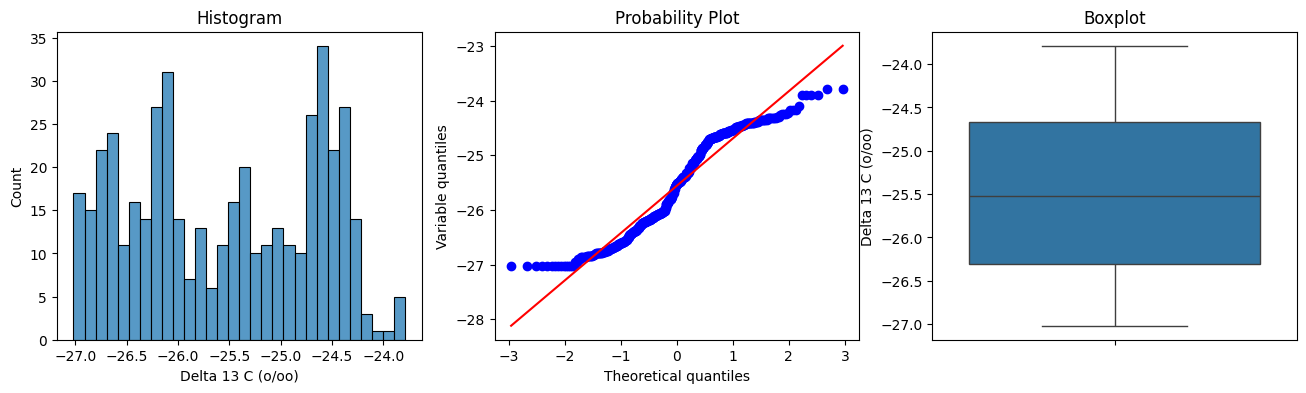

In [54]:
diagnostic_plots(ds, 'Delta 13 C (o/oo)')

***Забираємо аномалії із характеристики Delta 15 N***

In [55]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

Delta15N_upper_limit, Delta15N_lower_limit = find_skewed_boundaries(ds, 'Delta 15 N (o/oo)', 1.5)
Delta15N_upper_limit, Delta15N_lower_limit

(10.960719999999998, 6.705279999999999)

In [56]:
outliers_Delta15N = (ds['Delta 15 N (o/oo)'] > Delta15N_upper_limit) | (ds['Delta 15 N (o/oo)'] < Delta15N_lower_limit)

ds_trimmed = ds.loc[~outliers_Delta15N, ]

ds.shape, ds_trimmed.shape

((452, 18), (439, 18))

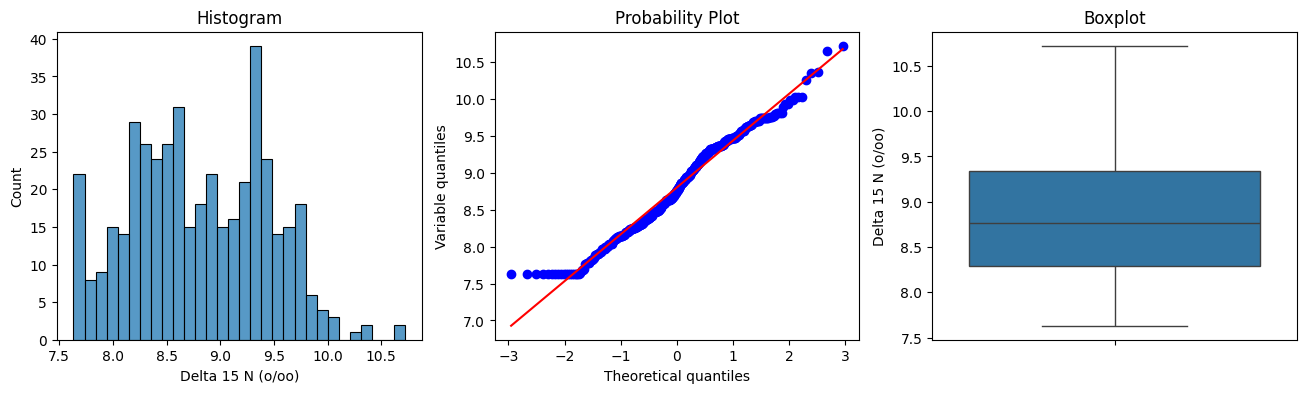

In [57]:
diagnostic_plots(ds_trimmed, 'Delta 15 N (o/oo)')

## Завдання 
**Використайте підходи масштабування ознак якщо це доцільно для ваших даних**

In [58]:
ds.describe()

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
count,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,227.659292,811.904867,227.659292,0.0,193.455752,1.0,3.238938,0.902655,88071.785398,45.001050,17.244061,200.889860,4158.308597,0.475664,8.889092,-25.556944,35.017699,1.002212
std,131.889589,84.090265,131.889589,0.0,53.918599,0.0,1.772039,0.296756,42833.119066,5.354886,1.941770,13.332903,783.232218,0.499961,0.812439,0.888149,7.199695,0.816946
min,0.000000,708.000000,0.000000,0.0,41.000000,1.0,1.000000,0.000000,11208.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540,11.000000,0.000000
25%,113.750000,708.000000,113.750000,0.0,180.000000,1.0,2.000000,1.000000,111008.000000,40.875000,15.700000,190.000000,3550.000000,0.000000,8.301070,-26.303928,37.000000,0.000000
50%,227.500000,809.000000,227.500000,0.0,231.000000,1.0,3.000000,1.000000,111709.000000,45.700000,17.500000,197.387188,3950.000000,0.000000,8.799865,-25.525500,37.000000,1.000000
75%,341.250000,910.000000,341.250000,0.0,231.000000,1.0,4.000000,1.000000,112408.000000,49.348727,18.716204,212.000000,4705.128432,1.000000,9.364930,-24.662590,37.000000,2.000000
max,455.000000,910.000000,455.000000,0.0,231.000000,1.0,11.000000,1.000000,113007.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,12.663872,-23.787670,68.000000,2.000000


***Стандартизуємо значення відносно середнього для Culmen Length (mm)', 'Body Mass (g)***

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds[['Culmen Length (mm)', 'Body Mass (g)']])

ds_scaled = scaler.transform(ds[['Culmen Length (mm)', 'Body Mass (g)']])

print('average values',scaler.mean_, 'standard deviation of signs', scaler.scale_)


average values [  45.00104977 4158.30859749] standard deviation of signs [  5.3489592  782.36533122]


In [60]:
ds_scaled = pd.DataFrame(ds_scaled, columns=['Culmen Length (mm)', 'Body Mass (g)'])

np.round(ds_scaled.describe(), 1)

,Culmen Length (mm),Body Mass (g)
count,452.0,452.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.4,-1.9
25%,-0.8,-0.8
50%,0.1,-0.3
75%,0.8,0.7
max,2.7,2.7


***Масштабування до максимуму та мінімуму***

In [61]:
column_bounds = ds.agg({'min', 'max'})
print(column_bounds)

     Unnamed: 0  studyName  Sample Number  Region  Island  Stage  \
min           0        708              0       0      41      1   
max         455        910            455       0     231      1   

     Individual ID  Clutch Completion  Date Egg  Culmen Length (mm)  \
min              1                  0     11208                32.1   
max             11                  1    113007                59.6   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
min               13.1                172.0         2700.0    0   
max               21.5                231.0         6300.0    1   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  Comments  Species  
min           7.632200          -27.01854        11        0  
max          12.663872          -23.78767        68        2  


In [62]:
ds[[
    'Island',
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)',
    'Delta 15 N (o/oo)',
    'Delta 13 C (o/oo)',
    'Comments',
    'Species'
]].describe()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,193.455752,45.001050,17.244061,200.889860,4158.308597,8.889092,-25.556944,35.017699,1.002212
std,53.918599,5.354886,1.941770,13.332903,783.232218,0.812439,0.888149,7.199695,0.816946
min,41.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,11.000000,0.000000
25%,180.000000,40.875000,15.700000,190.000000,3550.000000,8.301070,-26.303928,37.000000,0.000000
50%,231.000000,45.700000,17.500000,197.387188,3950.000000,8.799865,-25.525500,37.000000,1.000000
75%,231.000000,49.348727,18.716204,212.000000,4705.128432,9.364930,-24.662590,37.000000,2.000000
max,231.000000,59.600000,21.500000,231.000000,6300.000000,12.663872,-23.787670,68.000000,2.000000


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = [
    'Island',
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)',
    'Delta 15 N (o/oo)',
    'Delta 13 C (o/oo)',
    'Comments'
]

scaler.fit(ds[columns])

ds[columns] = scaler.transform(ds[columns])
print('Max', scaler.data_max_, '\nMin', scaler.min_, '\nRange', scaler.data_range_)

Max [ 231.         59.6        21.5       231.       6300.         12.663872
  -23.78767    68.      ] 
Min [-0.21578947 -1.16727273 -1.55952381 -2.91525424 -0.75       -1.51683178
  8.36262059 -0.19298246] 
Range [1.900000e+02 2.750000e+01 8.400000e+00 5.900000e+01 3.600000e+03
 5.031672e+00 3.230870e+00 5.700000e+01]


In [64]:
ds.describe()

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
count,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,227.659292,811.904867,227.659292,0.0,0.802399,1.0,3.238938,0.902655,88071.785398,0.469129,0.493341,0.489659,0.405086,0.475664,0.249796,0.452385,0.421363,1.002212
std,131.889589,84.090265,131.889589,0.0,0.283782,0.0,1.772039,0.296756,42833.119066,0.194723,0.231163,0.225981,0.217565,0.499961,0.161465,0.274895,0.126310,0.816946
min,0.000000,708.000000,0.000000,0.0,0.000000,1.0,1.000000,0.000000,11208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,708.000000,113.750000,0.0,0.731579,1.0,2.000000,1.000000,111008.000000,0.319091,0.309524,0.305085,0.236111,0.000000,0.132932,0.221183,0.456140,0.000000
50%,227.500000,809.000000,227.500000,0.0,1.000000,1.0,3.000000,1.000000,111709.000000,0.494545,0.523810,0.430291,0.347222,0.000000,0.232063,0.462117,0.456140,1.000000
75%,341.250000,910.000000,341.250000,0.0,1.000000,1.0,4.000000,1.000000,112408.000000,0.627226,0.668596,0.677966,0.556980,1.000000,0.344365,0.729200,0.456140,2.000000
max,455.000000,910.000000,455.000000,0.0,1.000000,1.0,11.000000,1.000000,113007.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


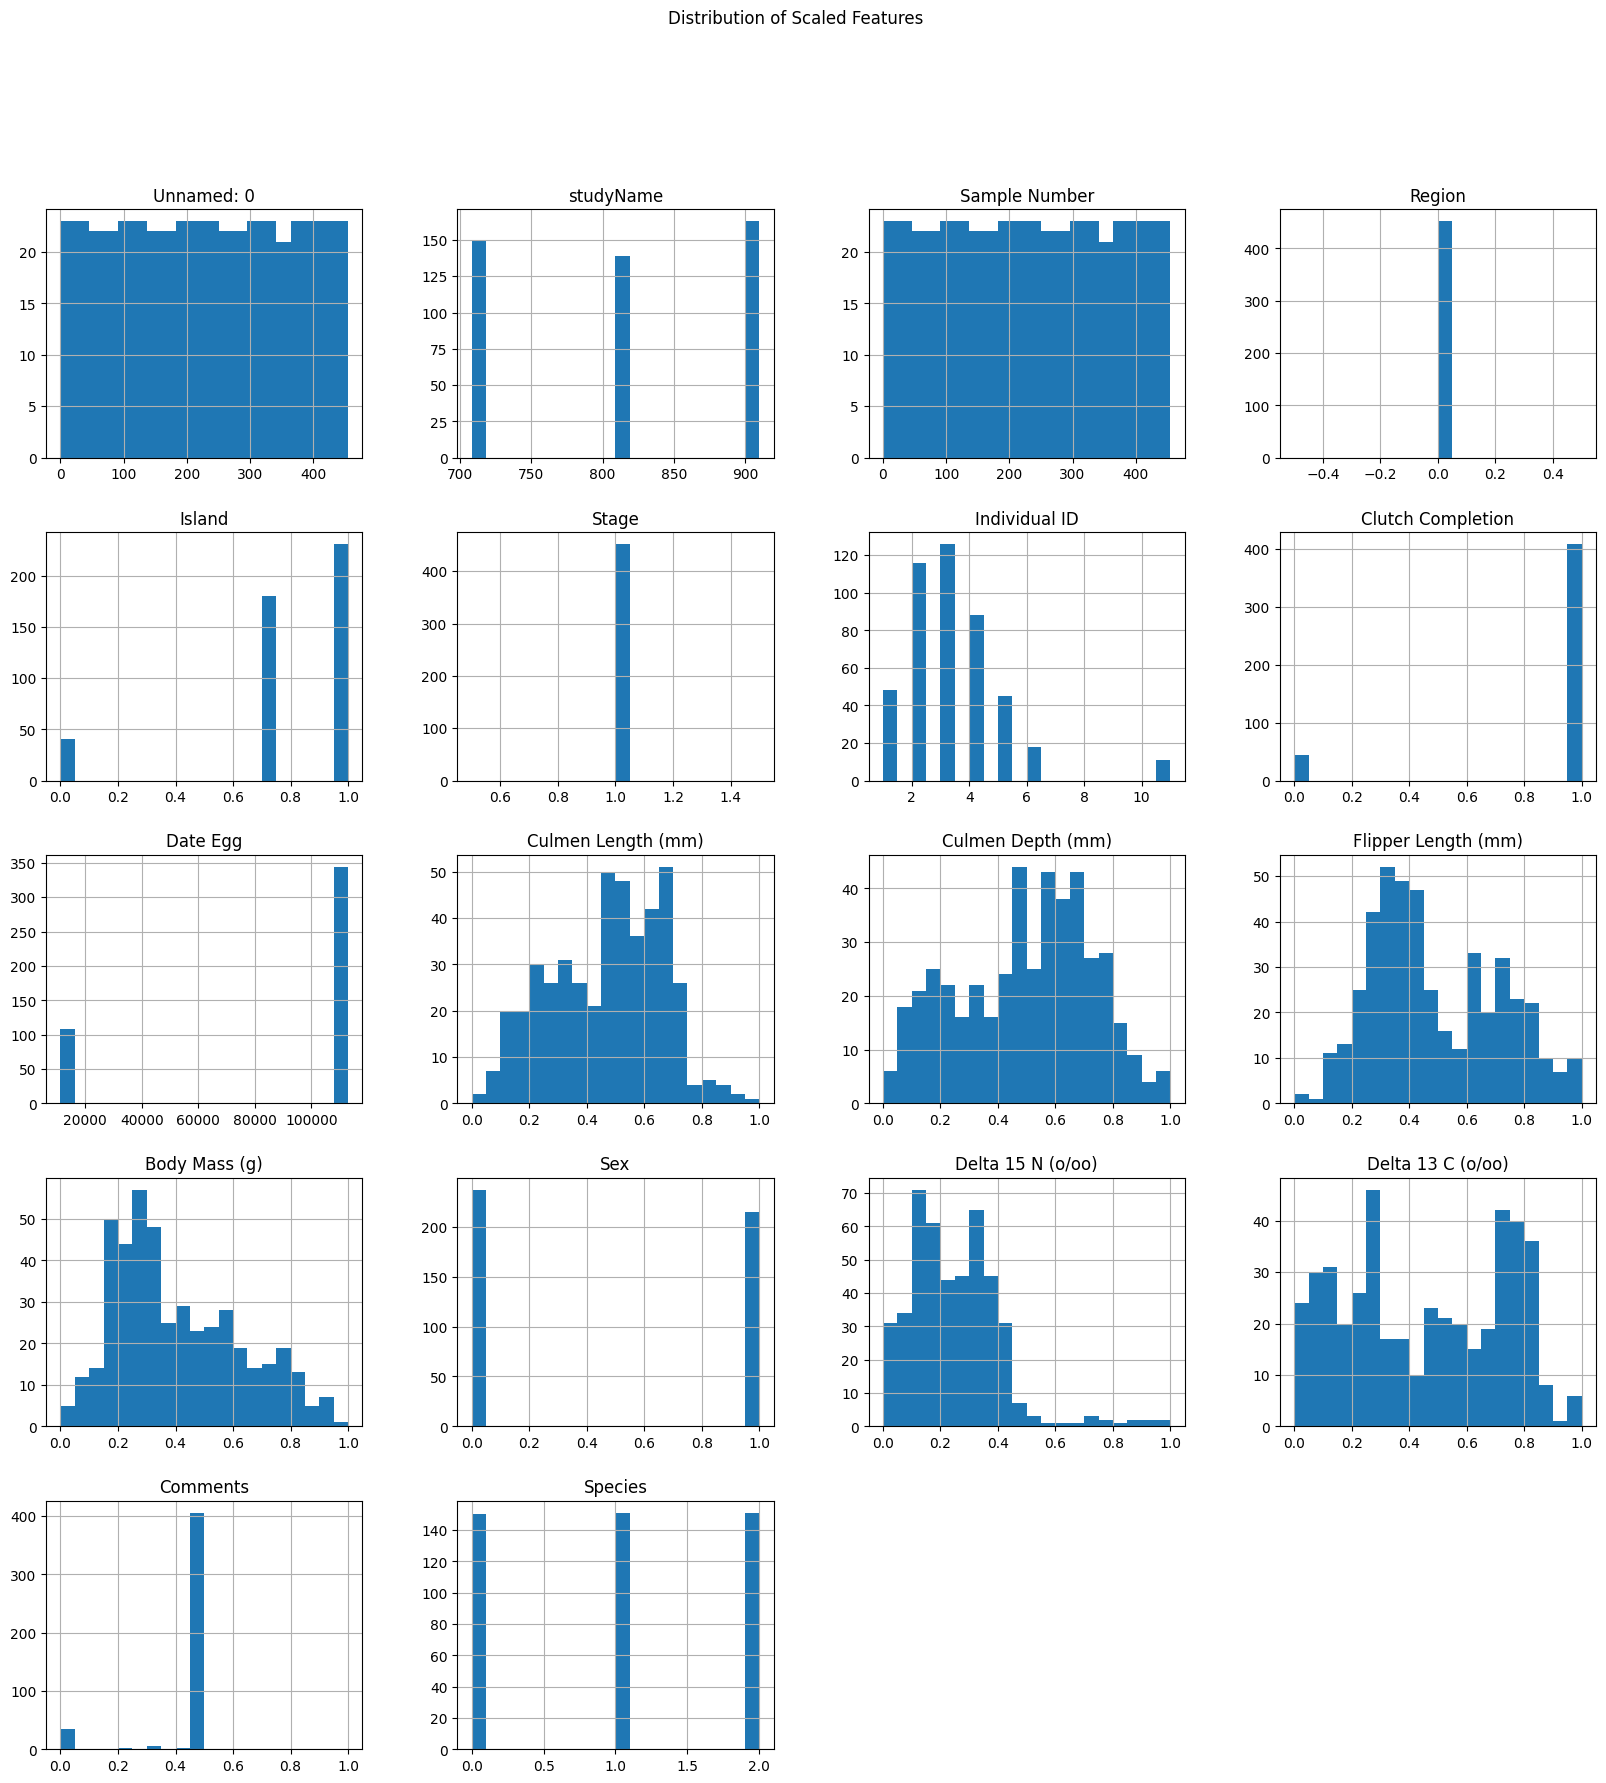

In [65]:
ds.hist(bins=20, figsize=(20, 20))
plt.suptitle('Distribution of Scaled Features')
plt.show()

### Висновок
У результаті виконання роботи, я опрацьовував датасет свого варіанту, а саме: замінив відсутні значення середнім значенням та медіаною, провів кодування категоріальних ознак, опрацьовував аномальні значення та масштабував ознаки.